In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
hipo=pd.read_csv('kyphosis.csv')

In [29]:
hipo.head(8)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16


In [4]:
hipo.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [5]:
hipo.shape

(81, 4)

In [6]:
hipo.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [7]:
hipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


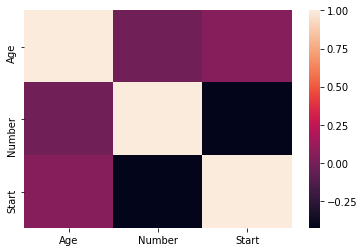

In [8]:
sns.heatmap(hipo.corr())

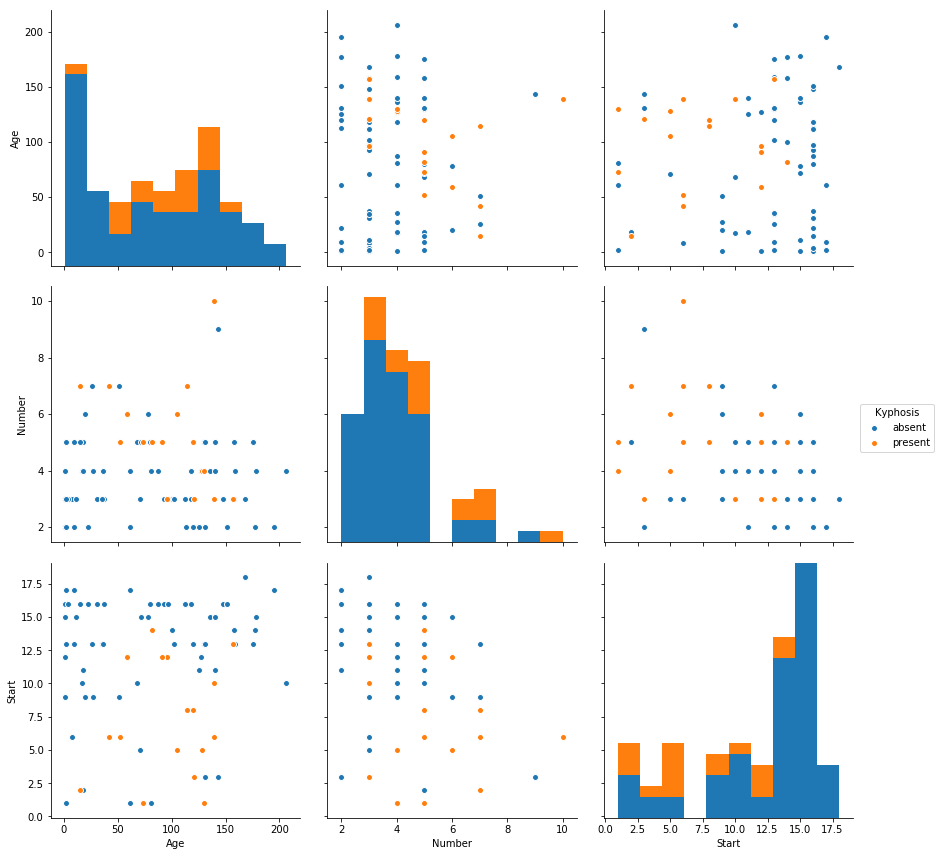

In [9]:
sns.pairplot(hipo,hue='Kyphosis',size=4)

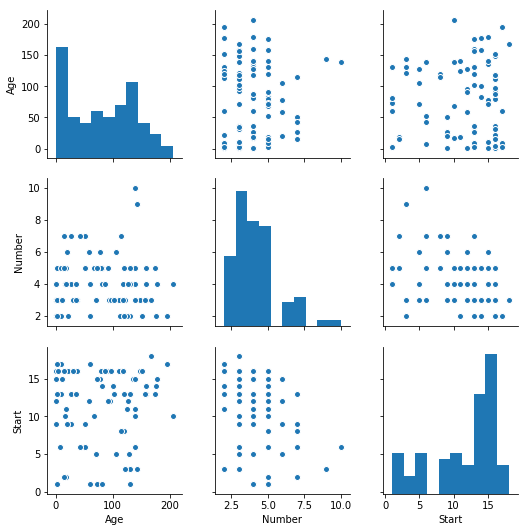

In [10]:
sns.pairplot(hipo)

In [25]:
yewe=pd.get_dummies(hipo,columns=["Kyphosis"],drop_first=True)

In [28]:
yewe.head(8)

,Age,Number,Start,Kyphosis_present
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0
5,1,2,16,0
6,61,2,17,0
7,37,3,16,0


In [32]:
yewe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Age                 81 non-null int64
Number              81 non-null int64
Start               81 non-null int64
Kyphosis_present    81 non-null uint8
dtypes: int64(3), uint8(1)
memory usage: 2.1 KB


In [33]:
#specify the input values and the target value
x=yewe[['Age','Number','Start']]
y=yewe['Kyphosis_present']

In [34]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=180)

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
igiti=DecisionTreeClassifier()

In [112]:
igiti.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
predictions=igiti.predict(x_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(confusion_matrix(y_test,predictions))

[[16  5]
 [ 3  1]]


In [116]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.76      0.80        21
          1       0.17      0.25      0.20         4

avg / total       0.73      0.68      0.70        25



In [117]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
ishyamba=RandomForestClassifier(n_estimators=850)

In [125]:
ishyamba.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
forest_pred=ishyamba.predict(x_test)

In [127]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
print(classification_report(y_test,forest_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93        21
          1       0.67      0.50      0.57         4

avg / total       0.87      0.88      0.87        25



In [123]:
print(confusion_matrix(y_test,forest_pred))

[[20  1]
 [ 2  2]]
